## 1. pobieranie bibliotek

In [66]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

## 2. Lista kodów produktów o których zostały pobrane

In [67]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

84514582


## 3. Wyczytwanie opinii o wskazanym produkcie

In [68]:
product_id = input("Podaj kod produktu z Ceneo.pl: ")
opinions = pd.read_json(f"opinions/{product_id}.json")
opinions.rating = opinions.rating.apply(lambda r : r.split("/")[0].replace(",",".")).astype(float)

## 4. Podstawowe statystyki

In [69]:
opinions_count = opinions.shape[0]
pros_count = opinions.pros.astype(bool).sum()
cons_count = opinions.cons.astype(bool).sum()
average_rating = opinions.rating.mean()
average_rating

4.377906976744186

## 5. Histogram ocen produktów

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


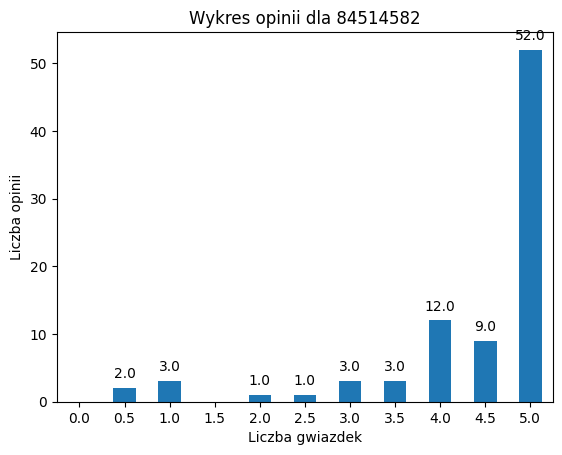

In [70]:
rating_distribution = opinions.rating.value_counts().reindex(np.arange(0,5.5,0.5))
rating_distribution.plot.bar()
plt.title(f"Wykres opinii dla {84514582}")
plt.xlabel("Liczba gwiazdek")
plt.ylabel("Liczba opinii")
plt.xticks(rotation=0)
for index, value in enumerate(rating_distribution):
    plt.text(index, value + 1.5, str(value), ha = "center")

## 6. wykres udziału rekomendacji w opisach produktów

Text(0.5, 1.0, 'Udział rekomendacji w opiniach o 84514582')

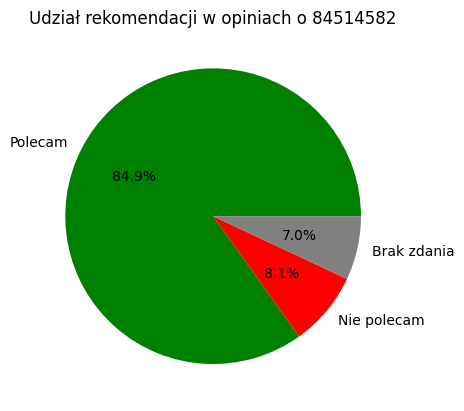

In [71]:
recommendation_distribution = opinions.recommandation.value_counts(dropna=False).reindex(["Polecam", "Nie polecam", None])
recommendation_distribution.plot.pie(label = "", autopct = lambda r : f"{r:1.1f}%" if r>0 else"", labels = ["Polecam", "Nie polecam", "Brak zdania"], colors = ["green", "red", "grey"])
plt.title(f"Udział rekomendacji w opiniach o {product_id}")

In [75]:
stats = {
    "product_id" : product_id,
    "opinions_count" : opinions_count,
    "pros_count" : int(pros_count),
    "cons_count" : int(cons_count),
    "average_rating" : average_rating,
    "rating_distribution" : rating_distribution.to_dict(),
    "recommendation_distribution" : recommendation_distribution.to_dict()
}

In [78]:
if not os.path.exists("stats"):
    os.mkdir("stats")
with open (f"stats/{product_id}.json", "w", encoding="UTF-8") as jf:
    json.dump(stats, jf, indent = 4, ensure_ascii = False)


In [ ]:
opinions

,author,recommandation,rating,content,pros,cons,opinion_date,purchase_date,likes,dislikes,opinion_id
0,g...6,None,3.0,Instalacja łatwa. Oprogramowanie HP Smart bezp...,[],[],2020-05-28 08:02:51,2020-05-04 22:29:44,19,3,12535429
1,b...a,Polecam,4.0,"Wykonana dobrze, trochę za duża, z ledwością m...",[],[],2020-12-10 19:41:04,2020-12-04 21:02:01,2,3,13551598
2,U...o,Polecam,4.5,Po 1 dniu uzytkowania mozna stwierdzic 1-polac...,[],[],2024-01-12 21:03:08,2024-01-09 18:20:01,0,0,18299406
3,k...l,Polecam,4.0,Wszystko z opisu się zgadza. Baaardzo ekonomic...,[],[],2021-11-18 17:47:41,2021-11-01 18:36:33,3,0,15226709
4,g...k,None,3.5,produkt na wstępie nie ruszył bo był problem z...,[],[],2020-12-04 00:11:48,2020-11-17 18:04:01,4,0,13501735
...,...,...,...,...,...,...,...,...,...,...,...
81,w...d,Nie polecam,1.0,badziew,[],[],2020-11-28 17:08:14,2020-10-28 14:03:29,1,0,13466015
82,b...o,Nie polecam,2.0,POLECAM,[],[],2022-02-21 10:21:10,2022-02-14 08:19:16,0,0,15730485
83,b...o,Nie polecam,0.5,polecam,[],[],2022-03-09 11:10:06,2022-03-08 11:01:43,0,1,15798075
84,Użytkownik Ceneo,Nie polecam,1.0,Koszmar. Zmuszenie jej do wydruku graniczy z c...,[],[],2020-01-26 21:28:27,None,2,1,11644241
